<a href="https://colab.research.google.com/github/pedadarohan-dot/Handwrittenrecognizer/blob/main/Handwrittendigitsrecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow numpy scikit-learn tensorflow

In [2]:
from PIL import Image
import numpy as np
# import mnist # No longer needed, as we're using TensorFlow for data loading
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow for reliable MNIST data loading

In [3]:
# Training Variables

# 1. Load MNIST dataset using TensorFlow Keras datasets
# This method reliably downloads the dataset if not present and returns it as NumPy arrays.
# It returns two tuples: (training images, training labels) and (test images, test labels).
(x_train_raw, y_train), (x_test_raw, y_test) = tf.keras.datasets.mnist.load_data()

# Explanation for Scikit-learn compatibility:
# Scikit-learn models (like MLPClassifier) typically expect a 2D array for input features (X),
# where each row is a sample and each column is a feature. The MNIST images are 28x28 pixels.
# Therefore, we need to 'flatten' each 2D image (28x28) into a 1D array of 784 pixels.

# 2. Reshape and Normalize the training image data
# Reshape: We convert the 3D array (num_images, height, width) into a 2D array (num_images, height * width).
#          The '-1' automatically calculates the number of images based on the array's size.
# Normalize: Image pixel values range from 0 to 255. Normalizing them to a 0-1 range helps
#            many machine learning algorithms, including neural networks, perform better.
# Reshape the training data
x_train = x_train_raw.reshape((x_train_raw.shape[0], -1))
# Normalize the training data
x_train = x_train/255.0

# The test data is loaded here for completeness, even if not immediately used for training.
# It undergoes the same reshaping and normalization as the training data.
# Reshape the testing data
x_test = x_test_raw.reshape((x_test_raw.shape[0], -1))
# Normalize the testing data
x_test = x_test/255.0

print(f"Shape of x_train (features for Scikit-learn): {x_train.shape}")
print(f"Shape of y_train (labels for Scikit-learn): {y_train.shape}")
print(f"Pixel values range from {x_train.min()} to {x_train.max()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of x_train (features for Scikit-learn): (60000, 784)
Shape of y_train (labels for Scikit-learn): (60000,)
Pixel values range from 0.0 to 1.0


In [4]:
print("X train", x_train)
print("Y train", y_train)
print("X test", x_test)
print("Y test", y_test)

X train [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y train [5 0 4 ... 5 6 8]
X test [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y test [7 2 1 ... 4 5 6]



Training the MLPClassifier...
Iteration 1, loss = 0.45320837
Iteration 2, loss = 0.18813675
Iteration 3, loss = 0.13831138
Iteration 4, loss = 0.11093933
Iteration 5, loss = 0.09118311
Iteration 6, loss = 0.07912969
Iteration 7, loss = 0.06996689
Iteration 8, loss = 0.06065056
Iteration 9, loss = 0.05248028
Iteration 10, loss = 0.04757902
Iteration 11, loss = 0.04254420
Iteration 12, loss = 0.03834070
Iteration 13, loss = 0.03585572
Iteration 14, loss = 0.03054541
Iteration 15, loss = 0.02809939
Iteration 16, loss = 0.02371189
Iteration 17, loss = 0.02187461
Iteration 18, loss = 0.01872986
Iteration 19, loss = 0.01746354
Iteration 20, loss = 0.01699935
Iteration 21, loss = 0.01420553
Iteration 22, loss = 0.01231390
Iteration 23, loss = 0.01177155
Iteration 24, loss = 0.01162016
Iteration 25, loss = 0.01202595
Iteration 26, loss = 0.00900015
Iteration 27, loss = 0.00774534
Iteration 28, loss = 0.00975872
Iteration 29, loss = 0.00875784
Iteration 30, loss = 0.00886182


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


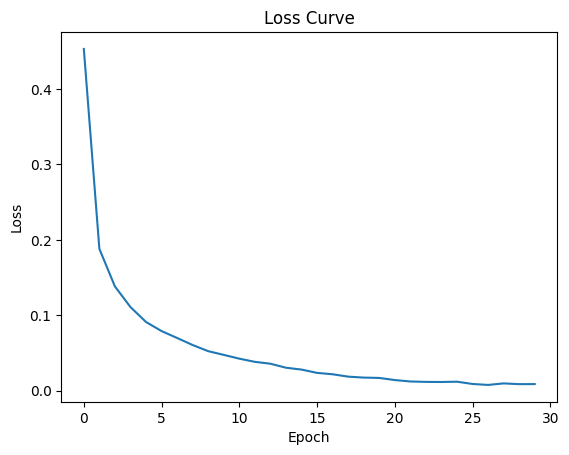

Training complete.


In [5]:
# 3. Initialize and train the MLPClassifier
# MLPClassifier is a type of neural network. The hidden_layer_sizes parameter defines the architecture of the neural network.
# (100,) means one hidden layer with 100 neurons.
# The 'adam' solver is a popular optimization algorithm.
# 'max_iter' sets the maximum number of epochs (passes over the training data).
# 'verbose=True' allows us to see the training progress.
mlp = MLPClassifier(hidden_layer_sizes=(64,64), max_iter=30,
                    solver='adam', verbose=True, random_state=1, learning_rate_init=.001, activation="relu")

# Train the model using the preprocessed training data
print("\nTraining the MLPClassifier...")
mlp.fit(x_train, y_train)
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
print("Training complete.")

In [6]:
predictions = mlp.predict(x_test)

In [7]:
accuracy = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{accuracy}")

Confusion Matrix:
[[ 971    0    1    1    0    0    2    1    4    0]
 [   0 1122    1    4    0    0    2    1    5    0]
 [   5    0  998   10    5    0    2    4    7    1]
 [   1    0    4  990    0    6    0    4    4    1]
 [   0    1    3    1  967    0    3    1    1    5]
 [   4    1    0   16    3  844   11    1    9    3]
 [   5    1    0    1    9    2  938    0    2    0]
 [   2    3    8    6    1    0    0  999    2    7]
 [   5    0    2   15    3    1    4    3  938    3]
 [   3    2    0    9   16    1    1    4    5  968]]


In [8]:
accuracy_score = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy_score}")

Accuracy: 0.9735


In [37]:
file_path = '/content/Number.png'
img = Image.open(file_path)

# Convert image to grayscale and resize to 28x28 pixels
img = img.convert('L') # 'L' mode for grayscale
img = img.resize((28, 28), Image.Resampling.LANCZOS) # It is for the high quality output after resizing the image

# Get pixel data. For a grayscale 28x28 image, getdata() will return 784 pixel values directly.
data = list(img.getdata())

print(data)

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 210, 210, 168, 168, 186, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 84, 2, 2, 2, 2, 51, 51, 84, 84, 186, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 186, 186, 231, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 117, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [18]:
for i in range(len(data)):
  data[i] = 255 - data[i]
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
data = np.array(data)/256

In [30]:
print(data)

[0. 0. 0. ... 0. 0. 0.]


In [38]:
prediction = mlp.predict([data])
print(prediction)

[5]
